In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Introducing Broadcasting

In [3]:
a = np.array([0, 1, 2])

In [4]:
b = np.array([5, 5, 5])

In [6]:
a + b 

array([5, 6, 7])

In [8]:
# the simplest example of broadcasting
a + 5

array([5, 6, 7])

In [9]:
M = np.ones((3, 3))

In [10]:
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [11]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

It's possible to broadcast both arrays, but we are not going to experiment with this at the moment.

## Rules of Broadcasting

We're not going to explore the rules in it's full complexity. They are way too complicated. Let's just try to understand the main ideas.

### Example 1

In [12]:
M = np.ones((2, 3))

In [13]:
M

array([[1., 1., 1.],
       [1., 1., 1.]])

In [14]:
a = np.arange(3)

In [15]:
a

array([0, 1, 2])

In [16]:
M.shape, a.shape

((2, 3), (3,))

Shapes are different, so we *add* a dimension of size 1 to the *left* (`Rule 1`). Now we expand this first dimension to 2 (`Rule 2`). Now shapes are the same and we can do our operations. What if they are still different? Then broadcasting is *not* possible (`Rule 3`).

In [17]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

### Example 2

In [18]:
a = np.arange(3).reshape((3, 1))

In [19]:
a

array([[0],
       [1],
       [2]])

In [22]:
a.shape

(3, 1)

In [20]:
b = np.arange(3)

In [21]:
b

array([0, 1, 2])

So we are doing the following expansions:
- expand `b` on the left to 1 (`(3,) -> (1, 3)`);
- expand `b` on this first dimension (`(1, 3) -> (3, 3)`);
- finally expand `a` on the second dimension (`(3, 1) -> (3, 3)`);

In [23]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### Example 3

In [24]:
M = np.ones((3, 2))

In [25]:
a = np.arange(3)

It's not actually possible to broadcast this. Why? Well, the first 2 steps are exactly the same as before, but then we can't expand the second dimension of M - it has a dimension `2`, not `1`. So we apply the `Rule 3` and halt.

## Broadcasting in Practice

### Centering an Array

Let's substract a mean from a 2-dimensional array.

In [26]:
rng = np.random.default_rng(seed=1701)

In [28]:
X = rng.random((10, 3))

In [29]:
X

array([[0.4020733 , 0.30563311, 0.67668051],
       [0.15821208, 0.79247763, 0.09419469],
       [0.36753944, 0.06388928, 0.96431608],
       [0.35200998, 0.54550343, 0.88597945],
       [0.57016965, 0.26614394, 0.8170382 ],
       [0.55906652, 0.06387035, 0.84877751],
       [0.89414484, 0.18920785, 0.23660015],
       [0.16502896, 0.56583856, 0.29513111],
       [0.29078012, 0.90079544, 0.59992434],
       [0.09133896, 0.00578466, 0.97096222]])

In [31]:
# again, mean over columns using axis=0, not axis=1
np.mean(X, axis=0)

array([0.38503638, 0.36991443, 0.63896043])

In [32]:
X - np.mean(X, axis=0)

array([[ 0.01703691, -0.06428131,  0.03772009],
       [-0.2268243 ,  0.4225632 , -0.54476574],
       [-0.01749695, -0.30602514,  0.32535566],
       [-0.0330264 ,  0.175589  ,  0.24701902],
       [ 0.18513326, -0.10377048,  0.17807777],
       [ 0.17403013, -0.30604408,  0.20981709],
       [ 0.50910846, -0.18070657, -0.40236028],
       [-0.22000743,  0.19592414, -0.34382932],
       [-0.09425626,  0.53088102, -0.03903608],
       [-0.29369742, -0.36412976,  0.33200179]])

Let's check, that the result is correct. We may see, that the result for the first row is in fact correct.

In [33]:
X[0] 

array([0.4020733 , 0.30563311, 0.67668051])

In [34]:
X[0] - np.mean(X, axis=0)

array([ 0.01703691, -0.06428131,  0.03772009])

### Plotting a Two-Dimensional Function

In [35]:
x = np.linspace(0, 5, 50)

In [36]:
y = np.linspace(0, 5, 50)[:, np.newaxis]

In [37]:
x.shape, y.shape

((50,), (50, 1))

In [43]:
# here we use broadcasting
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [40]:
z.shape

(50, 50)

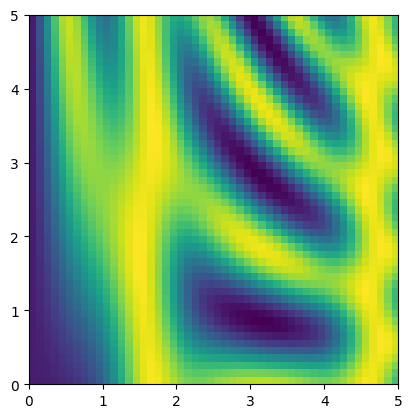

In [42]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5]);

This concludes the chapter on broadcasting.